In [ ]:
pip install pillow

In [3]:
cd drive/Shareddrives/21-01 데마팀 화이팅/데이터셋/tmp_사진작업

/content/drive/Shareddrives/21-01 데마팀 화이팅/데이터셋/tmp_사진작업


In [2]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
path="/content/drive/Shareddrives/21-01 데마팀 화이팅/데이터셋/크롤링 사진"
target_path="/content/drive/Shareddrives/21-01 데마팀 화이팅/데이터셋/tmp_사진작업/"

In [4]:
def RGB2HEX(color): #RGB값 16진수로 변환
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [5]:
def get_image(image_path): #이미지 BGR에서 RGB로 불러오기
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
Colors = pd.DataFrame(index=range(0,1200), columns=['name','color1', 'color2', 'color3', 'color4', 'color5'])
c=0

for filename in os.listdir(target_path):
  
    input_path = os.path.join(target_path,filename)
    image = Image.open(input_path)
    image = image.convert('RGBA')
    try:
        #cv2_imshow(cropped)
        print(filename, end=' ')

        #Transparency
        newImage = []
        for item in image.getdata():
          if item[:3] == (255, 255, 255):
              newImage.append((255, 255, 255, 0))
          else:
              newImage.append(item)

        image.putdata(newImage)
        image.save('output.png')

        image = get_image('output.png')

        modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
        modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

        from sklearn.cluster import KMeans
        clf = KMeans(n_clusters = 5, random_state=42)
        labels = clf.fit_predict(modified_image)

        from collections import Counter
        counts = Counter(labels)      
        center_colors = clf.cluster_centers_

        # We get ordered colors by iterating through the keys
        ordered_colors = [center_colors[i] for i in counts.keys()]
        hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
        rgb_colors = [ordered_colors[i] for i in counts.keys()]

        # into DataFrame
        Colors.loc[c,'name'] = filename
        Colors.loc[c,'color1'] = center_colors[0]
        Colors.loc[c,'color2'] = center_colors[1]
        Colors.loc[c,'color3'] = center_colors[2]
        Colors.loc[c,'color4'] = center_colors[3]
        Colors.loc[c,'color5'] = center_colors[4]
        c=c+1
        
    except TypeError:
        #print("Not working/",filename,end=' ')
        not_working.append(filename)
        pass

500799.jpg 500527.jpg 500798.jpg 500526.jpg 500525.jpg 500796.jpg 500795.jpg 500794.jpg 500518.jpg 500791.jpg 500517.jpg 500790.jpg 500516.jpg 500789.jpg 500515.jpg 500788.jpg 500514.jpg 500787.jpg 500513.jpg 500512.jpg 500785.jpg 500511.jpg 500510.jpg 500509.jpg 500508.jpg 500507.jpg 500506.jpg 500504.jpg 500503.jpg 500773.jpg 500502.jpg 500501.jpg 500500.jpg 500770.jpg 500498.jpg 500497.jpg 500496.jpg 500764.jpg 500492.jpg 500762.jpg 500490.jpg 500489.jpg 500759.jpg 500488.jpg 500758.jpg 500757.jpg 500756.jpg 500484.jpg 500755.jpg 500483.jpg 500482.jpg 500754.jpg 500753.jpg 500478.jpg 500476.jpg 500475.jpg 500474.jpg 500473.jpg 500744.jpg 500743.jpg 500742.jpg 500741.jpg 500467.jpg 500740.jpg 500466.jpg 500739.jpg 500738.jpg 500737.jpg 500463.jpg 500462.jpg 500736.jpg 500461.jpg 500735.jpg 500460.jpg 500734.jpg 500459.jpg 500458.jpg 500732.jpg 500457.jpg 500731.jpg 500456.jpg 500730.jpg 500455.jpg 500454.jpg 500728.jpg 500453.jpg 500727.jpg 500452.jpg 500726.jpg 500451.jpg 500725.jpg

In [6]:

image = Image.open("/content/drive/Shareddrives/21-01 데마팀 화이팅/데이터셋/tmp_사진작업/501535.jpg")
image = image.convert('RGBA')

#Transparency
newImage = []
for item in image.getdata():
  if item[:3] == (255, 255, 255):
      newImage.append((255, 255, 255, 0))
  else:
      newImage.append(item)

image.putdata(newImage)
image.save('output.png')

image = get_image('output.png')

modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

from sklearn.cluster import KMeans
clf = KMeans(n_clusters = 5, random_state=42)
labels = clf.fit_predict(modified_image)

from collections import Counter
counts = Counter(labels)      
center_colors = clf.cluster_centers_

# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

# into DataFrame
Colors.loc[c,'name'] = filename
Colors.loc[c,'color1'] = center_colors[0]
Colors.loc[c,'color2'] = center_colors[1]
Colors.loc[c,'color3'] = center_colors[2]
Colors.loc[c,'color4'] = center_colors[3]
Colors.loc[c,'color5'] = center_colors[4]
c=c+1



NameError: ignored

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


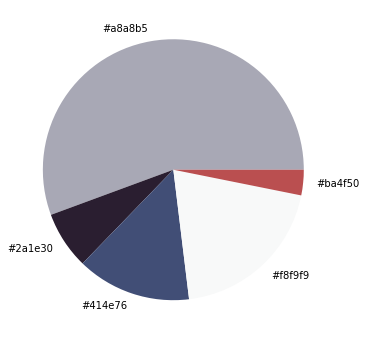

In [13]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

if (True):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [ ]:
Colors = Colors.dropna()
print(Colors)

#524349
['#ba7340', '#d5d5d4', '#524349', '#fcfcfc', '#969fa7']
            name  ...                                             color5
0     500799.jpg  ...  [217.9084030723431, 192.64863005846712, 105.25...
1     500527.jpg  ...  [220.42343173431715, 60.06503690036972, 54.577...
2     500798.jpg  ...  [157.72459325630663, 166.60315963216559, 150.1...
3     500526.jpg  ...  [207.11565217391478, 54.167391304341336, 48.04...
4     500525.jpg  ...  [42.29272928871595, 39.53614235172222, 43.0820...
...          ...  ...                                                ...
1106  500536.jpg  ...  [252.98242473545912, 252.99215622451524, 252.4...
1107  500533.jpg  ...  [65.18466120625605, 157.90171258376768, 219.23...
1108  500532.jpg  ...  [82.89514563106032, 87.43067961165347, 98.2077...
1109  500529.jpg  ...  [150.4025088296312, 159.39909876994383, 167.65...
1110  output.png  ...  [150.4025088296312, 159.39909876994383, 167.65...

[1111 rows x 6 columns]


In [ ]:
Colors.to_csv('example.csv')